<h1> Synthetic Minority Oversampling Technique (SMOTE)</h1>

When working with imbalanced datasets, the minority class tends to be predicted poorly, although the minority class is usually the most important. 

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

A random example from a minority class is selected. Then it's k nearest neighbors are found, then a synthetic sample is created at it's randomly selecte neighbor.

It is best to first do random undersampling to trim the number of examples in the majority class. Then use SMOTE to oversample

This approach is effective because we are creating synthetic examples belonging to the minority class which are close to existing minority samples. 

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class= 1, weights=[0.99],flip_y = 0, random_state=1)

In [4]:
import collections
counter = collections.Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


99% of class is 0

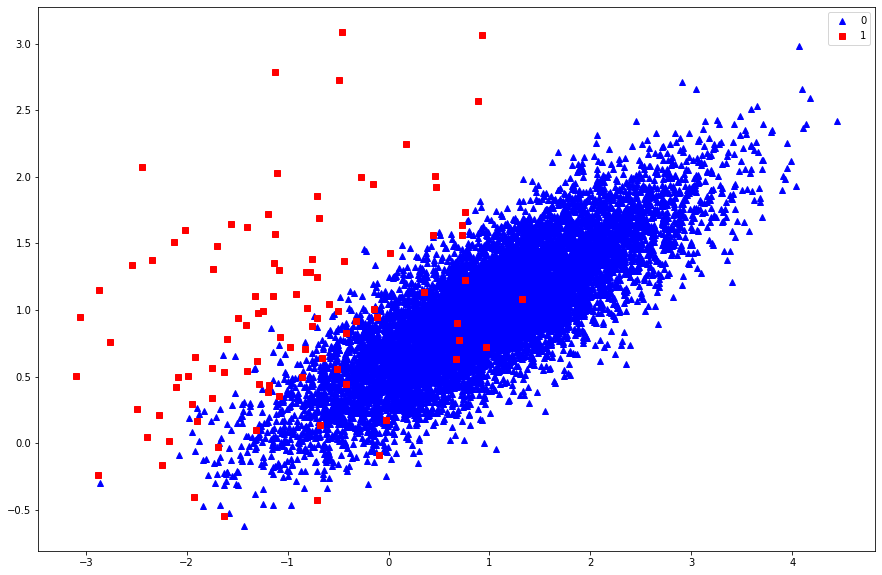

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(X[y == 0,0],X[y == 0,1],'b^',label = '0')
ax.plot(X[y == 1,0],X[y == 1,1],'rs',label = '1')
ax.legend()


In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [7]:
X_smote,y_smote = oversample.fit_resample(X,y)

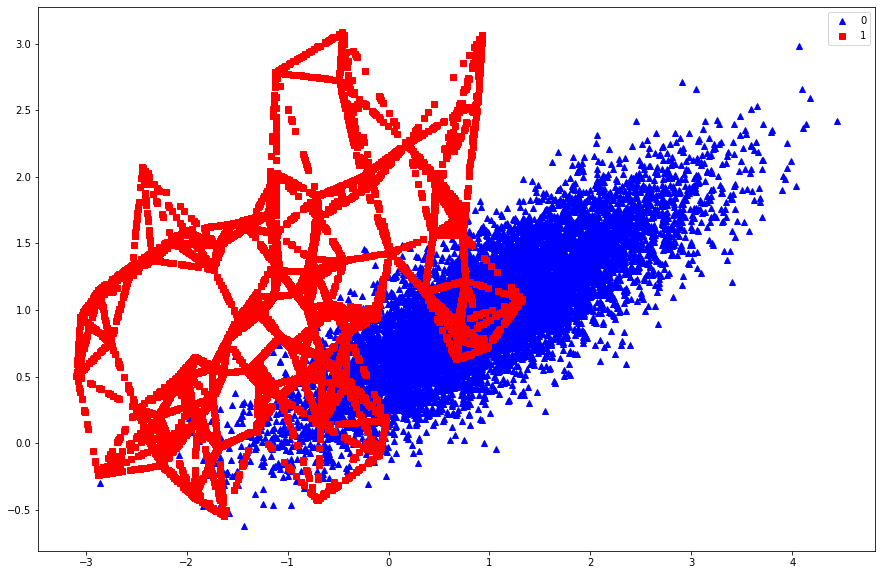

In [9]:
fig,ax_smote = plt.subplots(1,1,figsize = (15,10))
ax_smote.plot(X_smote[y_smote == 0,0],X_smote[y_smote == 0,1],'b^',label = '0')
ax_smote.plot(X_smote[y_smote == 1,0],X_smote[y_smote == 1,1],'rs',label = '1')
ax_smote.legend()

Above only does oversampling of the minority class. However SMOTE works well if combined with undersampling of the majority class followed by oversampling of the minority class.

Update to first oversample the minority class to have 10% the number of examples of the majority class, then use random undersampling to reduce the number of examples to have 50% more than the minority class

In [10]:
#making undersampling and oversampling pipeline
from imblearn.under_sampling import RandomUnderSampler
#increases the number of minority class by 10% of the number of majority class
over = SMOTE(sampling_strategy=0.1)
#takes only 50% of the number of majority class
under = RandomUnderSampler(sampling_strategy = 0.5)

In [16]:
#oversampling
X_over,y_over = over.fit_resample(X,y)
#undersampling
X_under,y_under = under.fit_resample(X_over,y_over)

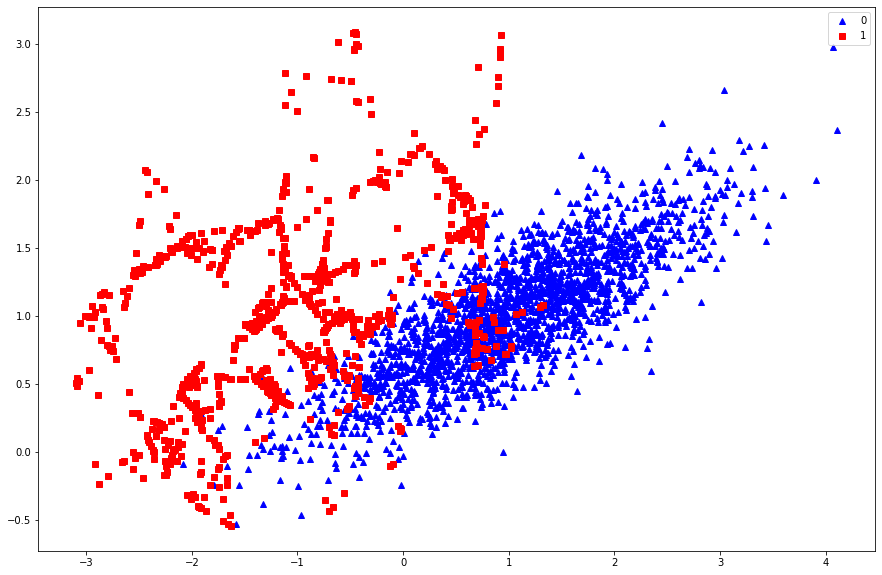

In [17]:
fig,ax_ou = plt.subplots(1,1,figsize = (15,10))
ax_ou.plot(X_under[y_under == 0,0],X_under[y_under == 0,1],'b^',label = '0')
ax_ou.plot(X_under[y_under == 1,0],X_under[y_under == 1,1],'rs',label = '1')
ax_ou.legend()

In [19]:
import collections
print(collections.Counter(y_under))

Counter({0: 1980, 1: 990})


<h2> SMOTE for classification </h2>

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3, random_state = 1)
scores = cross_val_score(model,X,y,scoring = 'roc_auc',cv = cv, n_jobs = -1)

In [23]:
import numpy as np
np.mean(scores)

0.7691919191919193

In [29]:
#with SMOTE
over = SMOTE()
X_smote_2,y_smote_2 = over.fit_resample(X,y)

In [30]:
model_smote = DecisionTreeClassifier()
cv_smote = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3, random_state = 1)
scores = cross_val_score(model_smote,X_smote_2,y_smote_2,scoring = 'roc_auc',cv = cv_smote, n_jobs = -1)

In [31]:
np.mean(scores)

0.9369696969696971

In [32]:
model_smote_ou = DecisionTreeClassifier()
#over sample
X_smote_o,y_smote_o = SMOTE(sampling_strategy=0.1).fit_resample(X,y)
X_under,y_under = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_smote_o,y_smote_o)
cv_smote = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3, random_state = 1)
scores = cross_val_score(model_smote_ou,X_under,y_under,scoring = 'roc_auc',cv = cv_smote, n_jobs = -1)

In [33]:
np.mean(scores)

0.9191077441077442